In [15]:
# Import required libraries
import json
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import logging
import sys
import os

from importlib import reload
import src.analysis.topic as topic
reload(topic)

# Import all functions from the topic module
from src.analysis.topic import (
    read_json_in_chunks_with_ids,
    parse_topic_file,
    update_comments_with_clusters,
    analyze_cluster_distribution,
    analyze_user_clusters,
    calculate_user_sentiment_ratios,
    load_and_process_data,
    search_comments,
    display_search_results,
    read_comment_topic_clusters
)

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [16]:
# First, define your file paths
JSON_FILE = Path('2025.04.05 ToPeraicaLiska/commentedPool.json')
TOPICS_FILE = Path('2025TrollDetection/Topics/topicClusterText_EVOC_Art_ChT_KeyBERT_0.txt')

# Use the load_and_process_data function to load and process everything
articles_df, comments_df = load_and_process_data(
    json_file_path=JSON_FILE,
    topic_file_path=TOPICS_FILE,
    max_entries=200000  # Adjust as needed
)

# Now you can run the analyze_cluster_distribution function
cluster_stats = analyze_cluster_distribution(comments_df)

# Display the statistics
total_comments = cluster_stats['total_comments']

print(f"\nCluster Assignment Statistics:")
print(f"Total comments: {total_comments}")
print(f"All comments have been assigned to clusters (including Unlabelled)")

Reading JSON file: 15517824it [00:13, 1179403.34it/s]
INFO:src.analysis.topic:Total number of articles: 10610
INFO:src.analysis.topic:Total number of comments: 348047



Cluster Assignment Statistics:
Total comments: 348047
All comments have been assigned to clusters (including Unlabelled)


In [17]:
articles_df.head()

,docId,docCode,docType,author,publishDate,url,title,content,attributes,docIdx,article_id,cluster_id,cluster_label
0,351534149,_SM0045989888,Article,,2024-08-31T05:45:00,https://www.novinky.cz/clanek/krimi-soudci-kte...,"Soudci, kteří dali podmínku znásilňujícímu...","Odvolací senát brněnského krajského soudu, kte...",{'sentiment': 'Negative'},202,0,89,156 rozsudku kriminálníkovi
1,410397749,_SM0066067764,Article,,2024-08-31T05:45:00,https://www.novinky.cz/clanek/krimi-opilec-na-...,Opilec na elektrokoloběžce smetl v Brně na cho...,Půl roku ve vězení bude muset strávit Dominik ...,{'sentiment': 'Negative'},200,1,74,197 sporťákem policistům
2,410397754,_SM0066067769,Article,,2024-08-31T06:03:00,https://www.novinky.cz/clanek/cestovani-cesky-...,Český dobrodruh jde pěšky od Pacifiku k Atlant...,Zamiloval si Jižní Ameriku. Poznávat se ji roz...,{'sentiment': 'Neutral'},348,2,-1,9458 Unlabelled
3,410397756,_SM0066067771,Article,,2024-08-31T06:05:00,https://www.novinky.cz/clanek/auto-kviz-skoda-...,"KVÍZ: Škoda Felicia slaví 30 let, jak dobře ji...",Felicia si zažila velkolepou premiéru v říjnu ...,{'sentiment': 'Neutral'},346,3,-1,9458 Unlabelled
4,410397761,_SM0066067776,Article,,2024-08-31T06:08:00,https://www.novinky.cz/clanek/domaci-jsem-vets...,"Jsem větší značka než Barrandov, řekl Soukup. ...",I když TV Barrandov nyní staví televizní progr...,{'sentiment': 'Neutral'},341,4,-1,9458 Unlabelled


In [18]:
comment_matches= search_comments(comments_df, articles_df, "požívat alkohol")
display_search_results(comment_matches)

Searching for comments containing 'požívat alkohol'...
Checking 348047 out of 348047 total comments


  0%|          | 0/348047 [00:00<?, ?it/s]

Found 0 comments containing 'požívat alkohol'

--- Top authors mentioning the search term ---


In [19]:
comments_df.head()

,docId,docCode,docType,author,publishDate,url,title,content,attributes,docIdx,article_id,replyToAuthor,replyToDocId,cluster_id,cluster_label
0,410398114,_SM0066068080,Comment,Tomáš Vojtěch,2024-08-31T08:04:00,https://www.novinky.cz/clanek/krimi-soudci-kte...,"Soudci, kteří dali podmínku znásilňujícímu otč...","Aha... Blažek... ""kárná žaloba by byla pouhé m...",{'sentiment': 'Negative'},923,0,NaN,NaN,89,156 rozsudku kriminálníkovi
1,410398115,_SM0066068081,Comment,Miroslav Vykoupil,2024-08-31T08:04:00,https://www.novinky.cz/clanek/krimi-soudci-kte...,"Soudci, kteří dali podmínku znásilňujícímu otč...",Polobozi v talárech,{'sentiment': 'Negative'},922,0,NaN,NaN,89,156 rozsudku kriminálníkovi
2,410398116,_SM0066068082,Comment,Jiří Šimoník,2024-08-31T08:04:00,https://www.novinky.cz/clanek/krimi-soudci-kte...,"Soudci, kteří dali podmínku znásilňujícímu otč...",A za odměnu jim ještě zvednou platy,{'sentiment': 'Ambivalent'},921,0,NaN,NaN,89,156 rozsudku kriminálníkovi
3,410398117,_SM0066068083,Comment,Dagmar Švehlová,2024-08-31T08:04:00,https://www.novinky.cz/clanek/krimi-soudci-kte...,"Soudci, kteří dali podmínku znásilňujícímu otč...","Zmiňovaný soudce nebude potrestán, další, kter...",{'sentiment': 'Negative'},920,0,NaN,NaN,89,156 rozsudku kriminálníkovi
4,410398118,_SM0066068084,Comment,Jan Novák,2024-08-31T08:04:00,https://www.novinky.cz/clanek/krimi-soudci-kte...,"Soudci, kteří dali podmínku znásilňujícímu otč...",Politická modro-komunistická zvůle na občanech...,{'sentiment': 'Negative'},919,0,NaN,NaN,89,156 rozsudku kriminálníkovi


In [20]:
comments_df.at[3365, 'content']

'To je něco pro pro "lepšolidi" a nuteláčkovi poskoky. Však ale jinak ať si jdou pokud to Rusko mají tak rádi. Já nepatřím ani k jedné bandě šašků. Já nevidím co se týče politických názorů jen černou a bílou.'

In [21]:
# Find article with specific title
target_title = "Již 78 dní oproti původnímu plánu jsou dva astronauti..."
matching_article = articles_df[articles_df['title'] == target_title]

if not matching_article.empty:
    print("\nFound matching article:")
    print(matching_article)
else:
    print("\nNo article found with that title")



Found matching article:
        docId        docCode  docType author          publishDate  \
60  412203922  _SM0066886627  Article         2024-08-31T22:57:00   

                                                  url  \
60  https://www.novinky.cz/clanek/zahranicni-foto-...   

                                                title  \
60  Již 78 dní oproti původnímu plánu jsou dva ast...   

                                              content  \
60  Již 78 dní oproti původnímu plánu jsou dva ast...   

                  attributes  docIdx  article_id  cluster_id  \
60  {'sentiment': 'Neutral'}    6910          60           0   

                cluster_label  
60  236 astronautů kosmonautů  


In [22]:
# Get comments for article_id 60 and sort by publishDate
article_60_comments = comments_df[comments_df['article_id'] == 60].sort_values('publishDate')

print(f"\nComments for article_id 60 (sorted by publish date):")
print(f"Total comments: {len(article_60_comments)}")
print("\n")

# Display each comment with timestamp and content
for _, comment in article_60_comments.iterrows():
    print(f"Time: {comment['publishDate']}")
    print(f"Author: {comment['author']}")
    print(f"Content: {comment['content']}")
    print("-" * 80)



Comments for article_id 60 (sorted by publish date):
Total comments: 50


Time: 2024-08-31T23:37:00
Author: Marek Šimon
Content: Tomu říkám přesčas :-)
--------------------------------------------------------------------------------
Time: 2024-08-31T23:40:00
Author: Koksal Petr
Content: Smutné na tom je, že se nemůžou vrátit zpět, kdyby chtěli.
--------------------------------------------------------------------------------
Time: 2024-08-31T23:40:00
Author: Oleg Pastrňák
Content: Letí, letí letadlo, Boeing, Boeing, Boeing. Bojím aby nespadlo, bojim, bojim, bojim
--------------------------------------------------------------------------------
Time: 2024-09-01T00:40:00
Author: Martin Zavadil
Content: Tal meui focením ora. Pak ana. Občas lickin.sguurt.pozor to poletí všude.Pokec s Hjistnem a fotí.e.Co dá.ek večeři?
--------------------------------------------------------------------------------
Time: 2024-09-01T00:40:00
Author: Miroslav Novotný
Content: Jestli ta prázdná loď doletí bez p

In [23]:
# Find comments by Martin Zavadil
zavadil_comments = comments_df[comments_df['author'] == 'Martin Zavadil']

print(f"\nFound {len(zavadil_comments)} comments by Martin Zavadil")
print("\nSample of comments:")

# Display each comment with details
for idx, comment in zavadil_comments.head(10).iterrows():
    print(f"\nTime: {comment['publishDate']}")
    print(f"Article ID: {comment['article_id']}")
    print(f"Cluster: {comment['cluster_label']}")
    print(f"Content: {comment['content']}")
    print("-" * 80)



Found 3 comments by Martin Zavadil

Sample of comments:

Time: 2024-08-31T16:55:00
Article ID: 39
Cluster: 286 českého školákům
Content: Vyjmenovaná slova jak když bičem mrská.Malá násobilka bez přemýšlení..To mě naučila základka do 5 tŕídy.Všeobecný přehled děják..fyzika chemka..tabulka prvků.Z hlavy s přehledem..Dnes mobil.Vypnoz net a jsou v prd.li.Mladíčci...Mamánkové...
--------------------------------------------------------------------------------

Time: 2024-09-01T00:40:00
Article ID: 60
Cluster: 236 astronautů kosmonautů
Content: Tal meui focením ora. Pak ana. Občas lickin.sguurt.pozor to poletí všude.Pokec s Hjistnem a fotí.e.Co dá.ek večeři?
--------------------------------------------------------------------------------

Time: 2025-03-05T16:02:00
Article ID: 8173
Cluster: 475 putinovým kyjevu
Content: až polezou do iráku..tak bych se na ně s pomocí z vysoka vy....
--------------------------------------------------------------------------------


In [24]:
# Get all comments from cluster 0
cluster_0_comments = comments_df[comments_df['cluster_id'] == 0]

print(f"\nFound {len(cluster_0_comments)} comments in cluster 0")
print(f"Cluster label: {cluster_0_comments['cluster_label'].iloc[0]}")

# Create output directory if it doesn't exist
output_dir = 'data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save to CSV file
output_file = os.path.join(output_dir, 'cluster_0_comments.csv')
cluster_0_comments.to_csv(output_file, index=False)

print(f"\nSaved comments to {output_file}")

# Display sample of comments
print("\nSample of comments from cluster 0:")
for _, comment in cluster_0_comments.head(5).iterrows():
    print(f"\nTime: {comment['publishDate']}")
    print(f"Author: {comment['author']}")
    print(f"Content: {comment['content']}")
    print("-" * 80)



Found 950 comments in cluster 0
Cluster label: 236 astronautů kosmonautů

Saved comments to data/cluster_0_comments.csv

Sample of comments from cluster 0:

Time: 2024-08-31T23:37:00
Author: Marek Šimon
Content: Tomu říkám přesčas :-)
--------------------------------------------------------------------------------

Time: 2024-08-31T23:40:00
Author: Koksal Petr
Content: Smutné na tom je, že se nemůžou vrátit zpět, kdyby chtěli.
--------------------------------------------------------------------------------

Time: 2024-08-31T23:40:00
Author: Oleg Pastrňák
Content: Letí, letí letadlo, Boeing, Boeing, Boeing. Bojím aby nespadlo, bojim, bojim, bojim
--------------------------------------------------------------------------------

Time: 2024-09-01T00:40:00
Author: Martin Zavadil
Content: Tal meui focením ora. Pak ana. Občas lickin.sguurt.pozor to poletí všude.Pokec s Hjistnem a fotí.e.Co dá.ek večeři?
--------------------------------------------------------------------------------

Time: 2

In [25]:
# Get the cluster label for cluster 0
cluster_0_label = comments_df[comments_df['cluster_id'] == 0]['cluster_label'].iloc[0]
print(f"\nCluster 0 label: {cluster_0_label}")



Cluster 0 label: 236 astronautů kosmonautů


In [26]:
from importlib import reload
import src.analysis.topic as topic
reload(topic)

from src.analysis.topic import read_comment_topic_clusters

comment_topic_clusters = read_comment_topic_clusters('2025TrollDetection/CommentSentChunks/doc2cluster_EVOC_Art_ChT_KeyBERT_0_0_KeyBERT_0.json')

comment_topic_clusters.head()



Successfully loaded 6708 comments with their topic clusters


,comment_id,content,comment_cluster_id,cluster_title
0,0,Tomu říkám přesčas :-),69,dočkáme počkám
1,1,"Smutné na tom je, že se nemůžou vrátit zpět, k...",-1,Unlabelled
2,2,"Letí, letí letadlo, Boeing, Boeing, Boeing",49,letadel 747
3,3,"Bojím aby nespadlo, bojim, bojim, bojim",82,riskujeme vyděšení
4,4,Tal meui focením ora,74,říkali citace


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


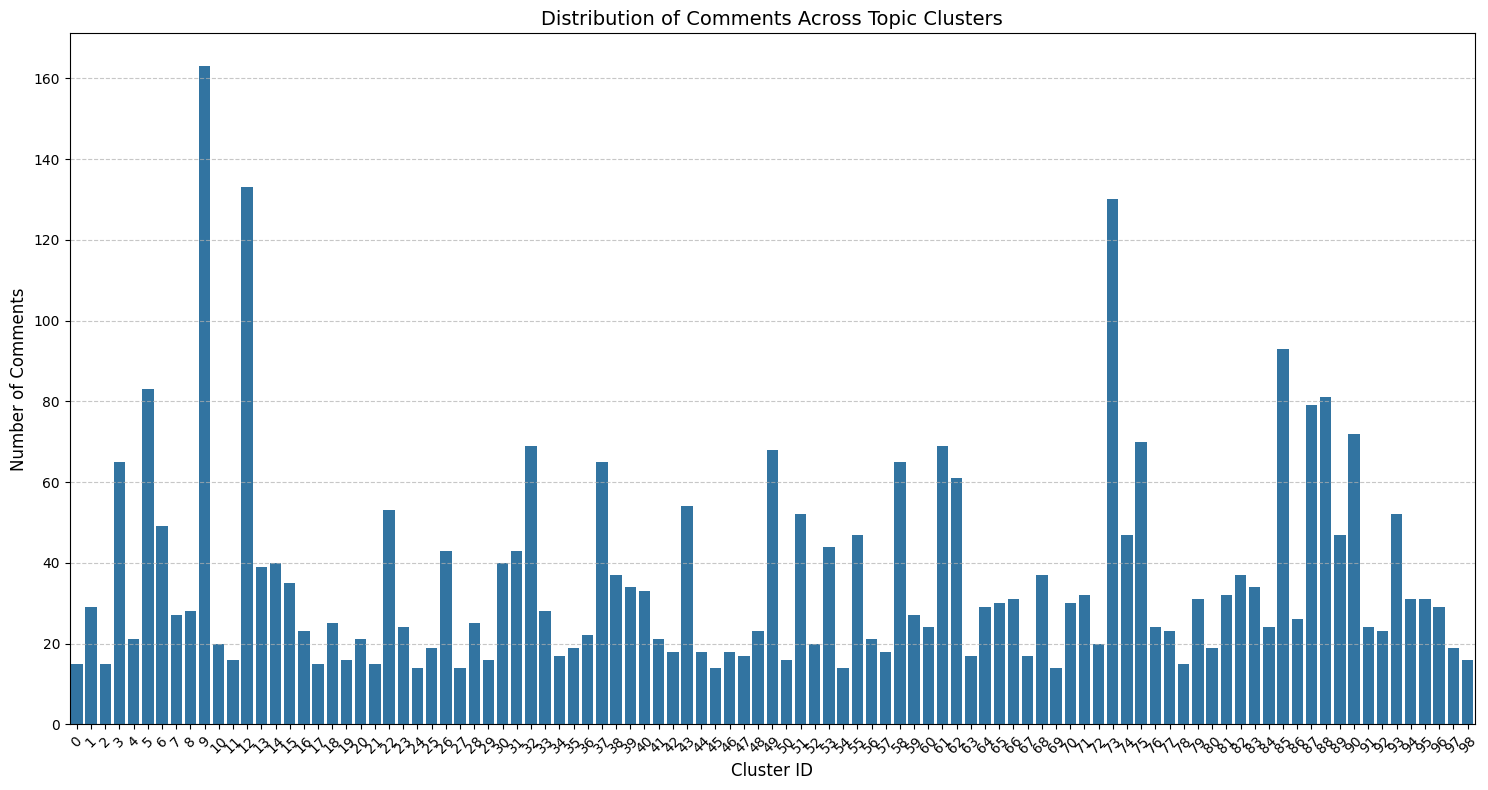


Total comments: 6708
Comments with topic clusters: 3603 (53.7%)
Unlabelled comments: 3105 (46.3%)
Number of unique topic clusters: 99

Top 10 largest clusters:
1. Cluster 9: russákům kosmonauty: 163 comments
2. Cluster 12: musk astronautovi: 133 comments
3. Cluster 73: zeměkoule plochozemců: 130 comments
4. Cluster 85: hlupáci egoismus: 93 comments
5. Cluster 5: česká čechoslováci: 83 comments
6. Cluster 88: vystupoval starliner: 81 comments
7. Cluster 87: byste blbosti: 79 comments
8. Cluster 90: těšil zahailuji: 72 comments
9. Cluster 75: úspěch byli: 70 comments
10. Cluster 61: měsíční planetky: 69 comments


In [27]:
# Create a bar plot of comment cluster frequencies
import matplotlib.pyplot as plt
import seaborn as sns

# Get value counts excluding -1 (unlabelled)
cluster_counts = comment_topic_clusters[comment_topic_clusters['comment_cluster_id'] != -1]['comment_cluster_id'].value_counts()

# Get cluster titles for top clusters
top_clusters = cluster_counts.head(10)
top_cluster_titles = []
for cluster_id in top_clusters.index:
    title = comment_topic_clusters[comment_topic_clusters['comment_cluster_id'] == cluster_id]['cluster_title'].iloc[0]
    top_cluster_titles.append(f"Cluster {cluster_id}: {title}")

# Create figure with larger size
plt.figure(figsize=(15, 8))

# Create bar plot
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)

# Customize plot
plt.title('Distribution of Comments Across Topic Clusters', fontsize=14)
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Number of Comments', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for easier reading of values
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()

# Print some statistics
total_comments = len(comment_topic_clusters)
unlabelled_comments = len(comment_topic_clusters[comment_topic_clusters['comment_cluster_id'] == -1])
labelled_comments = total_comments - unlabelled_comments

print(f"\nTotal comments: {total_comments}")
print(f"Comments with topic clusters: {labelled_comments} ({labelled_comments/total_comments*100:.1f}%)")
print(f"Unlabelled comments: {unlabelled_comments} ({unlabelled_comments/total_comments*100:.1f}%)")
print(f"Number of unique topic clusters: {len(cluster_counts)}")

print("\nTop 10 largest clusters:")
for i, (cluster_id, count) in enumerate(top_clusters.items(), 1):
    print(f"{i}. {top_cluster_titles[i-1]}: {count} comments")


In [28]:
# Get all cluster titles
print("\nAll cluster titles:")
for cluster_id in cluster_counts.index:
    title = comment_topic_clusters[comment_topic_clusters['comment_cluster_id'] == cluster_id]['cluster_title'].iloc[0]
    print(f"Cluster {cluster_id}: {title} ({cluster_counts[cluster_id]} comments)")



All cluster titles:
Cluster 9: russákům kosmonauty (163 comments)
Cluster 12: musk astronautovi (133 comments)
Cluster 73: zeměkoule plochozemců (130 comments)
Cluster 85: hlupáci egoismus (93 comments)
Cluster 5: česká čechoslováci (83 comments)
Cluster 88: vystupoval starliner (81 comments)
Cluster 87: byste blbosti (79 comments)
Cluster 90: těšil zahailuji (72 comments)
Cluster 75: úspěch byli (70 comments)
Cluster 61: měsíční planetky (69 comments)
Cluster 32: voda oceány (69 comments)
Cluster 49: letadel 747 (68 comments)
Cluster 37: stanislav hláška (65 comments)
Cluster 58: raket raketoplanu (65 comments)
Cluster 3: asteroidnímu mohl (65 comments)
Cluster 62: spacex vesmírný (61 comments)
Cluster 43: stoletím miliardami (54 comments)
Cluster 22: marťan marsu (53 comments)
Cluster 93: jaký kdo (52 comments)
Cluster 51: přistávací loď (52 comments)
Cluster 6: evropanům europarlamentu (49 comments)
Cluster 55: crew9 astronautů (47 comments)
Cluster 89: nemalujem kriminál (47 comme

In [35]:
from src.models.predictor import TrollPredictor

# Initialize predictor with model
model_path = ""

# Initialize predictor with model
predictor = TrollPredictor(
    model_path="checkpoints/best_model.pt",
    comments_per_user=5,
    max_length=96
)

INFO:src.models.predictor:Loaded model weights from checkpoints/best_model.pt


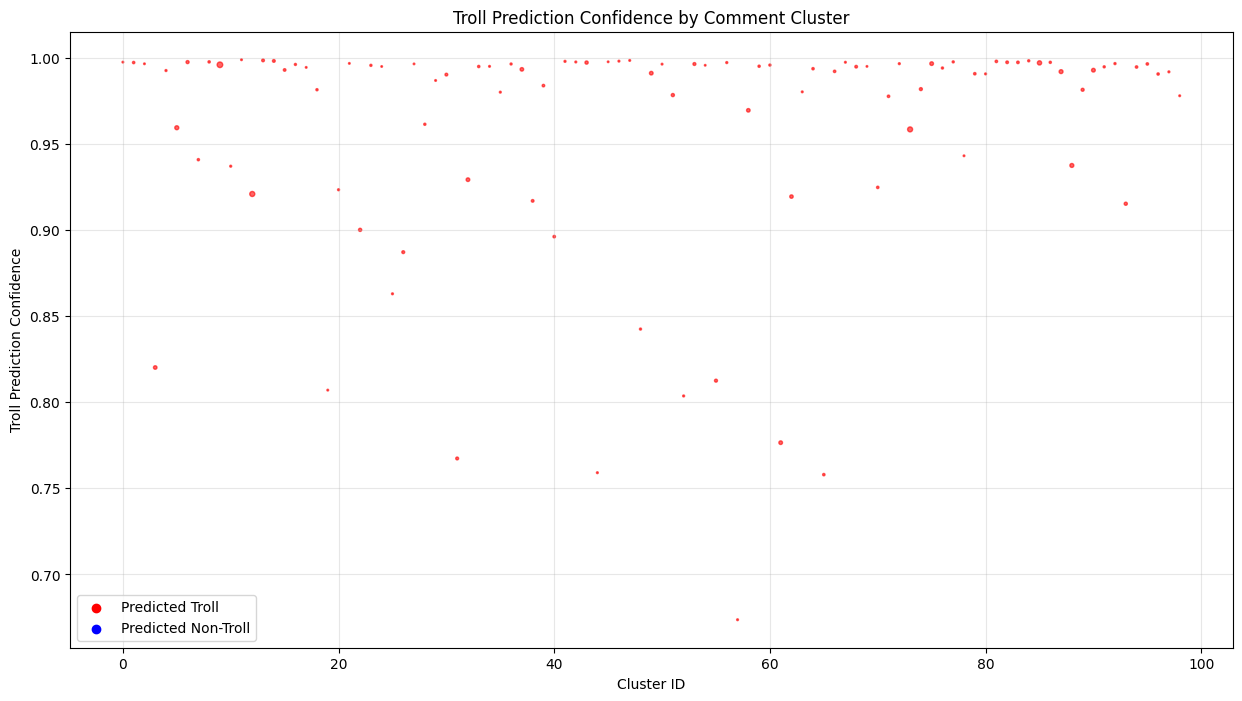


Clusters with highest troll prediction confidence:
Cluster 11 (trumpův musk): 0.999 confidence
Cluster 13 (trumpův republikáni): 0.998 confidence
Cluster 47 (liberale politikou): 0.998 confidence
Cluster 84 (žurnalistiky novináři): 0.998 confidence
Cluster 14 (americka proč): 0.998 confidence
Cluster 46 (voličská referendum): 0.998 confidence
Cluster 41 (vrátili nevrátí): 0.998 confidence
Cluster 81 (zastáncem pokrok): 0.998 confidence
Cluster 45 (politika zeman): 0.998 confidence
Cluster 77 (antipsychotika psychopatů): 0.997 confidence

Clusters with lowest troll prediction confidence:
Cluster 57 (motorové reaktor): 0.674 confidence
Cluster 65 (vesmírem kosmologie): 0.758 confidence
Cluster 44 (lidstva civilizaci): 0.759 confidence
Cluster 31 (teploty sluneční): 0.767 confidence
Cluster 61 (měsíční planetky): 0.776 confidence
Cluster 52 (utratí miliardám): 0.804 confidence
Cluster 19 (klimatickými uhlíkové): 0.807 confidence
Cluster 55 (crew9 astronautů): 0.812 confidence
Cluster 3 (

In [37]:
# Group comments by cluster and run predictions
cluster_predictions = {}

# Skip cluster -1 (unlabelled)
for cluster_id in cluster_counts.index:
    if cluster_id == -1:
        continue
        
    # Get comments for this cluster
    cluster_comments = comment_topic_clusters[
        comment_topic_clusters['comment_cluster_id'] == cluster_id
    ]['content'].tolist()
    
    # Get cluster title
    cluster_title = comment_topic_clusters[
        comment_topic_clusters['comment_cluster_id'] == cluster_id
    ]['cluster_title'].iloc[0]
    
    # Run prediction
    pred_result = predictor.predict(cluster_comments)
    
    # Store results
    cluster_predictions[cluster_id] = {
        'title': cluster_title,
        'confidence': pred_result['confidence'],
        'prediction': pred_result['prediction'],
        'num_comments': len(cluster_comments)
    }

# Create plot of troll prediction confidences by cluster
plt.figure(figsize=(15, 8))

# Extract data for plotting
cluster_ids = []
confidences = []
predictions = []
sizes = []
titles = []

for cluster_id, data in cluster_predictions.items():
    cluster_ids.append(cluster_id)
    confidences.append(data['confidence'])
    predictions.append(data['prediction'])
    sizes.append(data['num_comments'])
    titles.append(data['title'])

# Create scatter plot
colors = ['red' if p else 'blue' for p in predictions]
plt.scatter(cluster_ids, confidences, c=colors, s=[s/10 for s in sizes], alpha=0.6)

plt.xlabel('Cluster ID')
plt.ylabel('Troll Prediction Confidence')
plt.title('Troll Prediction Confidence by Comment Cluster')

# Add legend
plt.scatter([], [], c='red', label='Predicted Troll')
plt.scatter([], [], c='blue', label='Predicted Non-Troll')
plt.legend()

# Add grid
plt.grid(True, alpha=0.3)

# Show plot
plt.show()

# Print statistics
print("\nClusters with highest troll prediction confidence:")
sorted_clusters = sorted(
    cluster_predictions.items(), 
    key=lambda x: x[1]['confidence'], 
    reverse=True
)

for cluster_id, data in sorted_clusters[:10]:
    print(f"Cluster {cluster_id} ({data['title']}): {data['confidence']:.3f} confidence")

print("\nClusters with lowest troll prediction confidence:")
sorted_clusters = sorted(
    cluster_predictions.items(),
    key=lambda x: x[1]['confidence']
)

for cluster_id, data in sorted_clusters[:10]:
    print(f"Cluster {cluster_id} ({data['title']}): {data['confidence']:.3f} confidence")

